In [1]:
%matplotlib inline
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('agaricus-lepiota.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
sub_df = df[[0,5,1]]

In [5]:
sub_df.columns = ['edible_poison', 'odor','cap_shape']

In [6]:
sub_df.head()

,edible_poison,odor,cap_shape
0,p,p,x
1,e,a,x
2,e,l,b
3,p,p,x
4,e,n,x


In [10]:
sub_df.dtypes

edible_poison    object
odor             object
cap_shape        object
dtype: object

In [11]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 3 columns):
edible_poison    8124 non-null object
odor             8124 non-null object
cap_shape        8124 non-null object
dtypes: object(3)
memory usage: 95.2+ KB


In [12]:
sub_df.describe()

,edible_poison,odor,cap_shape
count,8124,8124,8124
unique,2,9,6
top,e,n,x
freq,4208,3528,3656


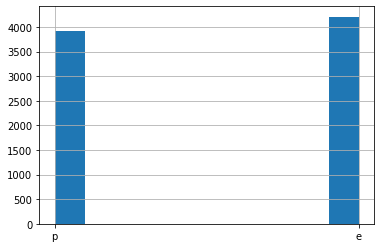

In [13]:
sub_df.edible_poison.hist()

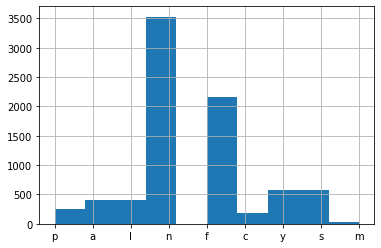

In [14]:
sub_df.odor.hist()

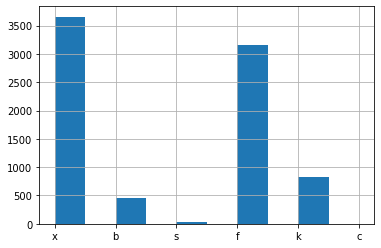

In [15]:
sub_df.cap_shape.hist()

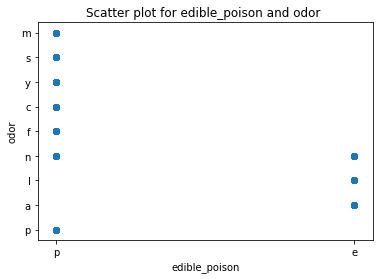

In [16]:
plt.scatter(sub_df['edible_poison'], sub_df['odor'], alpha=0.5)
plt.title('Scatter plot for edible_poison and odor ')
plt.xlabel('edible_poison')
plt.ylabel('odor')
plt.show()

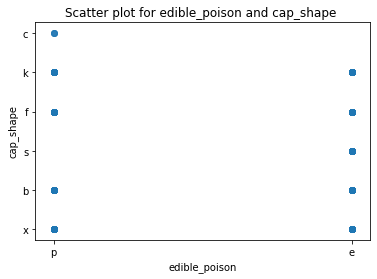

In [17]:
plt.scatter(sub_df['edible_poison'], sub_df['cap_shape'], alpha=0.5)
plt.title('Scatter plot for edible_poison and cap_shape ')
plt.xlabel('edible_poison')
plt.ylabel('cap_shape')
plt.show()

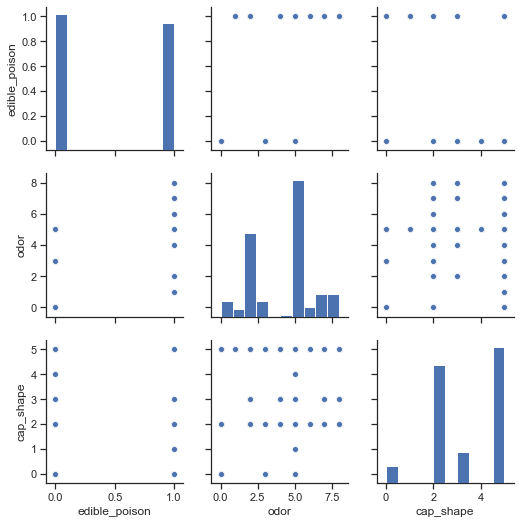

In [21]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(sub_df)

In [24]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
# edible or poisonous
sub_df.loc[:,'edible_poison'] = le.fit_transform(sub_df['edible_poison'])
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
sub_df.loc[:,'odor'] = le.fit_transform(sub_df['odor'])
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
sub_df.loc[:,'cap_shape'] = le.fit_transform(sub_df['cap_shape'])
#display the initial records
sub_df.head()

,edible_poison,odor,cap_shape
0,1,6,5
1,0,0,5
2,0,3,0
3,1,6,5
4,0,5,5


In [25]:
# select columns other than 'edible_poison' because this column is the target
cols = [col for col in sub_df.columns if col not in ['edible_poison']]
# dropping the 'edible_poison' column
data = sub_df[cols]
#assigning the 'edible_poison' column as target
target = sub_df['edible_poison']
data.head(n=2)

,odor,cap_shape
0,6,5
1,0,5


In [26]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.9864643150123051


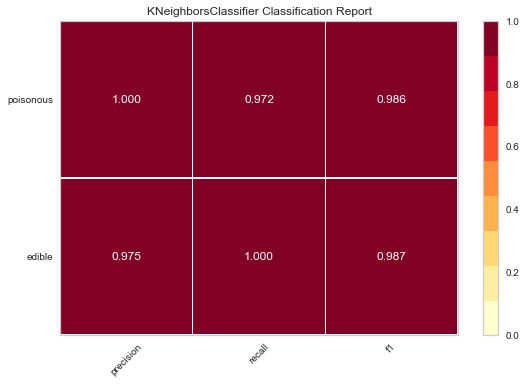

In [28]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['edible','poisonous'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data